# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\VTripathi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


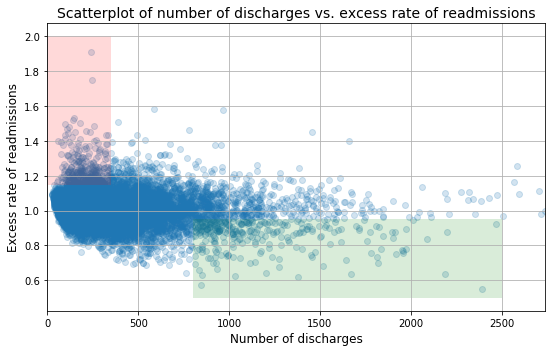

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

**Do you agree with the above analysis and recommendations? Why or why not?**

The scatterplot above does not provide sufficient information to support the initial observations. 

The first observation "Overall, rate of readmissions is trending down with increasing number of discharges" does not seem correct. Some of the data points are closely clustered making it difficult to view the full distribution properly to determine if the rate of readmissions is actually trending down. 
    
The second observation "With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)" is correct. There are clearly more points in the red box area towards the left of the graph than the right of the graph. 

The third observation "With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)" may or may not be true. The graph shows that hospitals/facilities with low discharge numbers have a large spread of high and low rates of readmissions. Therefore, it's hard to quantify from the graph whether there actually is a greater incidence of lower rates of readmission with higher numbers of discharges.
    
The above observations and recommendations are based on one scatter plot of the data, with no accompanying statistical analysis to substantiate the claims. We must do hypotheses analysis to further determine if the above observations can be agreed upon.

**Provide support for your arguments and your own recommendations with a statistically sound analysis**

Let's first examine the data

In [5]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [6]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


In [7]:
# Number of Discharges and Excess Readmission Ratio are the most important variables for our analysis.
clean_df = clean_hospital_read_df

clean_df = clean_df[pd.to_numeric(clean_df['Number of Discharges'], errors='coerce').notnull()]
clean_df = clean_df[pd.to_numeric(clean_df['Excess Readmission Ratio'], errors='coerce').notnull()]

clean_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013


In [8]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 12 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int32
Footnote                      0 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


In [9]:
x = clean_df['Number of Discharges']
y = clean_df['Excess Readmission Ratio']

Let's now check to see if the Statistics listed above are correct.

In [10]:
lt_100 = clean_df[clean_df['Number of Discharges'] < 100]

mean_readmit = np.mean(lt_100['Excess Readmission Ratio'])
ratio_over_one = (float(np.sum(lt_100['Excess Readmission Ratio'] > 1))/float(len(lt_100)))*100
print('In hospitals/facilities with number of discharges < 100:')
print('Mean excess readmission rate is', round(mean_readmit,3), 'and')
print(round(ratio_over_one, 0), '% have excess readmission rate greater than 1')

In hospitals/facilities with number of discharges < 100:
Mean excess readmission rate is 1.023 and
63.0 % have excess readmission rate greater than 1


In [11]:
gt_1000 = clean_df[clean_df['Number of Discharges'] > 1000]

mean_readmit = np.mean(gt_1000['Excess Readmission Ratio'])
ratio_over_one = (float(np.sum(gt_1000['Excess Readmission Ratio'] > 1))/float(len(gt_1000)))*100
print('In hospitals/facilities with number of discharges > 1000:')
print('Mean excess readmission rate is', round(mean_readmit,3), 'and')
print(round(ratio_over_one, 0), '% have excess readmission rate greater than 1')

In hospitals/facilities with number of discharges > 1000:
Mean excess readmission rate is 0.978 and
44.0 % have excess readmission rate greater than 1


So we can see that the Statistics listed under section B are correct.

**Setup an appropriate hypothesis test**

$H$o: There is no significant correlation between hospital capacity (number of discharges) and readmission rates. <BR>
$H$a: There is a significant correlation between hospital capacity (number of discharges) and readmission rates.

**Compute and report the observed significance value (or p-value)**

In [12]:
from scipy.stats import linregress
linregress(x, y)

LinregressResult(slope=-2.9010517330570697e-05, intercept=1.018106147373357, rvalue=-0.09739794351079352, pvalue=1.2225473776734486e-25, stderr=2.7649127349110587e-06)

In [13]:
x.corr(y)

-0.09739794351079353

The correlation coefficient is -0.097 and the p-value is significant at 1.2e-25 < 0.05, we can reject $H$o and accept $H$a.

The regression line shows a negative relationship and the p-value indicates a statistical significance. However, since the correlation coefficient is so close to zero, it cannot be said that there is a strong relationship between the two variables.

**Report statistical significance for  𝛼  = .01**

Since p-value = 1.2e-25 < 0.01, the statistical significance is the same as when α = .05.

**Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?**

Statistical significance indicates that there is sufficient evidence to conclude that an effect exists. It is a mathematical definition that does not know anything about the subject area and what constitutes an important effect.<BR>
Practical significance refers to the magnitude of the effect. One needs to apply their subject area knowledge and expertise to determine whether the effect is big enough to be meaningful in the real world.
    
Statistically, we have proven that there is a significance between the number of discharges and the excess readmission ratio, therefore the $H$o can be rejected. However, because the correlation coefficient is so close to zero, it cannot be said that there is a strong correlation between the two variables. So practically speaking, their correlation is weak. Therefore in this case, the statistical significance differs from the practical significance.

Let's set up another hypotheses test.
If X = readmission ratio in small hospitals
and Y = readmission ratio in large hospitals,

H0: $u$X - $u$Y = 0 <BR>
Ha: $u$X - $u$Y $\neq$ 0

In [15]:
from scipy import stats
small = clean_df[x <= 300]
large = clean_df[x >= 800]

small_dis = small['Excess Readmission Ratio']
large_dis = large['Excess Readmission Ratio']

# two-sample t-test
stats.ttest_ind(small_dis, large_dis)

Ttest_indResult(statistic=9.174367343659634, pvalue=5.866125679715e-20)

The p-value for this test is 5.87e-20. With $\alpha$ = 0.01, we reject the null hypothesis and conclude that there is a difference between the readmission ratios in large and small hospitals/facilities. This also supports the report's claim that some smaller hospitals may be lacking resources for adequate care.

Therefore, we can agree on the recommendation that hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.

**Look at the scatterplot above.
What are the advantages and disadvantages of using this plot to convey information?
Construct another plot that conveys the same information in a more direct manner**

The advantage of the above scatterplot is that it shows the small negative correlation between ERRs and the number of discharges. Based on how the points are spread, it's possible to see how much randomness there is in the data or the strength of the correlation. The disadvantage is that quite a few data points are clustered closely together. Some of the points are overlapping, making it difficult to determine the correlation in the dense regions. As there are so many points in the dataset and the representation among small and large hospitals/facilities is not equal, the scatterplot fails to effectively communicate any differences between small and large facilities' excess readmissions rates.

Let's try plotting a jointplot by adding regression to the scatterplot.

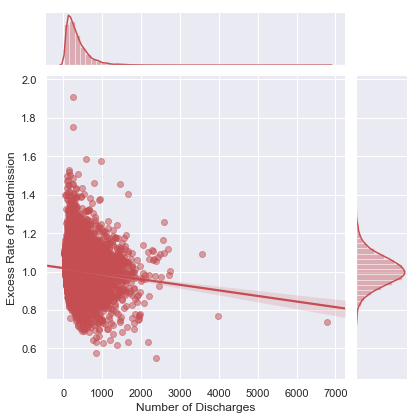

In [17]:
import seaborn as sns

sns.set(color_codes=True)
sns.jointplot(x= 'Number of Discharges', y = 'Excess Readmission Ratio', data=clean_hospital_read_df, color='r',
              kind='reg', height=6, scatter_kws={'alpha':0.5}).set_axis_labels('Number of Discharges', 'Excess Rate of Readmission')

plt.show()

From this chart, we can see a decline in readmissions rate as the number of discharges increases. Adding a linear regression line to the graph has added clarity and made misinterpretation of the graph less likely.